In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('used_cars.csv')
df

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,...,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,...,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,7049052853,https://kpr.craigslist.org/ctd/d/pasco-diesels...,kennewick-pasco-richland,https://kpr.craigslist.org,49999,2016.0,ram,cummin 2500 laramie,NaN,...,4wd,NaN,truck,grey,https://images.craigslist.org/00h0h_d5xQ6Q7Ygd...,Call or Text 509-412-3404 2016 Dodge Ram 2500...,NaN,wa,46.2348,-119.128
19997,19997,7049052797,https://kpr.craigslist.org/ctd/d/yakima-2018-n...,kennewick-pasco-richland,https://kpr.craigslist.org,12127,2018.0,nissan,sentra,NaN,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00Y0Y_cuQ8XIP5R4...,Bud Clary Toyota of YakimaÂ Â Â Â Â Â Â Â STOC...,NaN,wa,46.5642,-120.496
19998,19998,7049049369,https://kpr.craigslist.org/ctd/d/walla-walla-2...,kennewick-pasco-richland,https://kpr.craigslist.org,0,2019.0,jeep,grand cherokee limited,NaN,...,4wd,NaN,SUV,NaN,https://images.craigslist.org/00h0h_gvXVsydGQd...,Chrysler Dodge Jeep Ram of Walla WallaÂ Â Â Â ...,NaN,wa,46.0783,-118.293
19999,19999,7049042761,https://kpr.craigslist.org/ctd/d/yakima-2017-t...,kennewick-pasco-richland,https://kpr.craigslist.org,14661,2017.0,toyota,corolla,NaN,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00P0P_94PZlFJECu...,Bud Clary Toyota of YakimaÂ Â Â Â Â Â Â Â STOC...,NaN,wa,46.5642,-120.496


In [3]:
data = (df[["price", "year"]])
data.head()

,price,year
0,17899,2012.0
1,0,2016.0
2,46463,2015.0
3,0,2016.0
4,49999,2018.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   20001 non-null  int64  
 1   year    19989 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 312.6 KB


In [5]:
data = data.fillna({'year':data['year'].median()})
data.head(11)

,price,year
0,17899,2012.0
1,0,2016.0
2,46463,2015.0
3,0,2016.0
4,49999,2018.0
5,13999,2009.0
6,34500,2017.0
7,14500,2007.0
8,12500,2013.0
9,34500,2012.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   20001 non-null  int64  
 1   year    20001 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 312.6 KB


In [7]:
dataa = (data[["price", "year"]])

In [8]:
X = dataa.iloc[:, [0, 1]].values

In [9]:
X

array([[17899.,  2012.],
       [    0.,  2016.],
       [46463.,  2015.],
       ...,
       [    0.,  2019.],
       [14661.,  2017.],
       [35999.,  2019.]])

In [10]:
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2

In [11]:
n_iter=10
K=4

In [12]:
Centroids=np.array([]).reshape(n,0)

In [13]:
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

In [14]:
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
  tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
  EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

In [15]:
Output={}

In [16]:
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

In [17]:
for i in range(n_iter):
     #step 2.a
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y

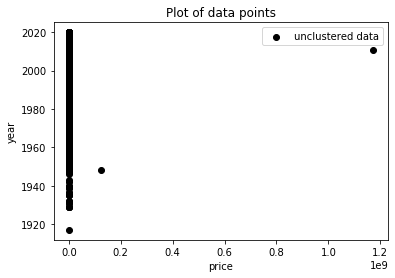

In [18]:
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('price')
plt.ylabel('year')
plt.legend()
plt.title('Plot of data points')
plt.show()

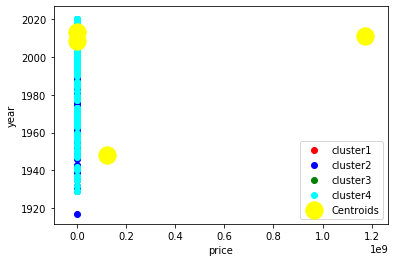

In [19]:
color=['red','blue','green','cyan']
labels=['cluster1','cluster2','cluster3', 'cluster4']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('price')
plt.ylabel('year')
plt.legend()
plt.show()

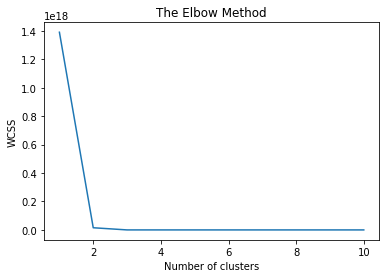

In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

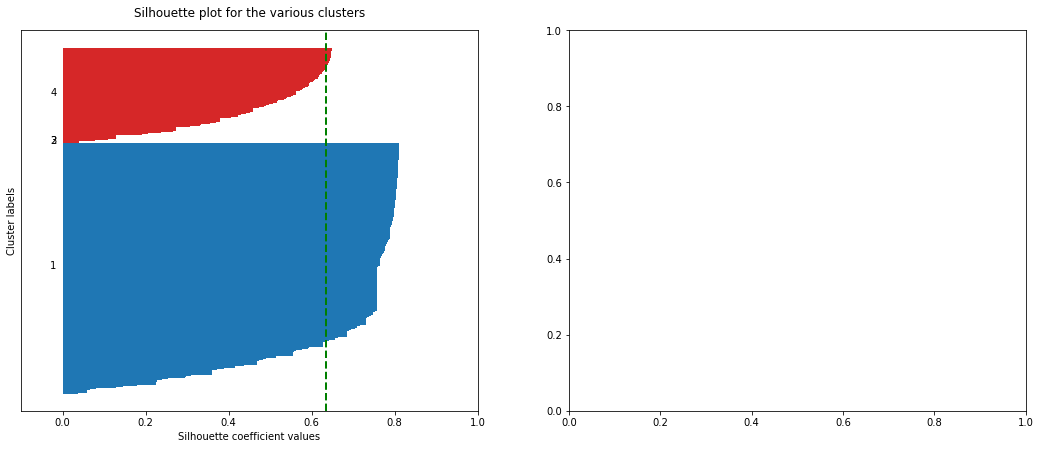

In [21]:
from sklearn.metrics import silhouette_samples

for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=K)
    labels = km.fit_predict(data)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(data, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(data[:, 0], data[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

Number Of Clusters:
2
Silhouette score value
0.8344474975518734
Number Of Clusters:
3
Silhouette score value
0.925957713652229
Number Of Clusters:
4
Silhouette score value
0.6163803026187085
Number Of Clusters:
5
Silhouette score value
0.41907226861788854
Number Of Clusters:
6
Silhouette score value
0.4317714105534834
Number Of Clusters:
7
Silhouette score value
0.438353239422781
Number Of Clusters:
8
Silhouette score value
0.3399288652957536
Number Of Clusters:
9
Silhouette score value
0.33263381700434913
Number Of Clusters:
10
Silhouette score value
0.34899177399407594
Number Of Clusters:
11
Silhouette score value
0.33255652940415437
Number Of Clusters:
12
Silhouette score value
0.3337702228514563
Number Of Clusters:
13
Silhouette score value
0.33004953751717286
Number Of Clusters:
14
Silhouette score value
0.3324387345162058
Number Of Clusters:
15
Silhouette score value
0.3369145724506629
Number Of Clusters:
16
Silhouette score value
0.3423787714574118
Number Of Clusters:
17
Silhoue

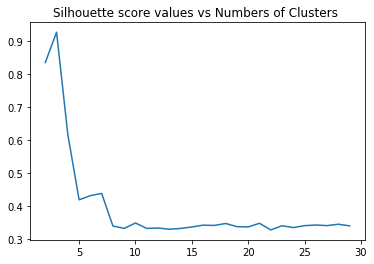

Optimal number of components is:
3


In [22]:
from sklearn import cluster
import numpy as numpy
import sklearn
import matplotlib.pyplot as plt


obs = numpy.concatenate( (numpy.random.randn(100, 2) , 20 + numpy.random.randn(300, 2) , -15+numpy.random.randn(200, 2)))
silhouette_score_values=list()

NumberOfClusters=range(2,30)

for i in NumberOfClusters:
    
    classifier=cluster.KMeans(i,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True)
    classifier.fit(obs)
    labels= classifier.predict(obs)
    print("Number Of Clusters:")
    print(i)
    print("Silhouette score value")
    print(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', sample_size=None, random_state=None))
    silhouette_score_values.append(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', sample_size=None, random_state=None))

plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()

Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print("Optimal number of components is:")
print(Optimal_NumberOf_Components)

In [25]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = K).fit(data)
  labels = kmeans.labels_
  sil.append(silhouette_score(data, labels, metric = 'euclidean'))
sil

[0.6355408757529601,
 0.6353471187920422,
 0.635544619553222,
 0.6331132865534095,
 0.6355004284047306,
 0.6359043827785168,
 0.6332014178533626,
 0.6359043827785168,
 0.6355004284047306]